<a href="https://colab.research.google.com/github/Saicharan-007/5-Days-Live-EDA-and-Feature-Engineering/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [63]:
  df=sns.load_dataset('iris')

In [64]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
df=df[df['species']!='versicolor']

In [66]:
df['species'].unique()

array(['setosa', 'virginica'], dtype=object)

In [67]:
df['species']=df['species'].map({'setosa':0,'virginica':1})

In [68]:
## features into independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [69]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8)

In [72]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
121,5.6,2.8,4.9,2.0
110,6.5,3.2,5.1,2.0
101,5.8,2.7,5.1,1.9
13,4.3,3.0,1.1,0.1
39,5.1,3.4,1.5,0.2
...,...,...,...,...
134,6.1,2.6,5.6,1.4
136,6.3,3.4,5.6,2.4
141,6.9,3.1,5.1,2.3
149,5.9,3.0,5.1,1.8


In [73]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()


In [74]:
from sklearn.model_selection import GridSearchCV
parameter={'C':[0.5,1,2,3,4,5,6,7,9,10,30,35],'penalty':['l1','l2','elasticnet']}
log_regression=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)
log_regression.fit(X,y)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 9, 10, 30, 35],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [75]:
print(log_regression.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [76]:

print(log_regression.best_score_)

1.0


In [77]:
pre=log_regression.predict(X_test)

In [78]:
 df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.217326,0.904825,0.853214,0.840970
sepal_width,-0.217326,1.000000,-0.488559,-0.458435,-0.545921
petal_length,0.904825,-0.488559,1.000000,0.969824,0.980948
petal_width,0.853214,-0.458435,0.969824,1.000000,0.974262
species,0.840970,-0.545921,0.980948,0.974262,1.000000


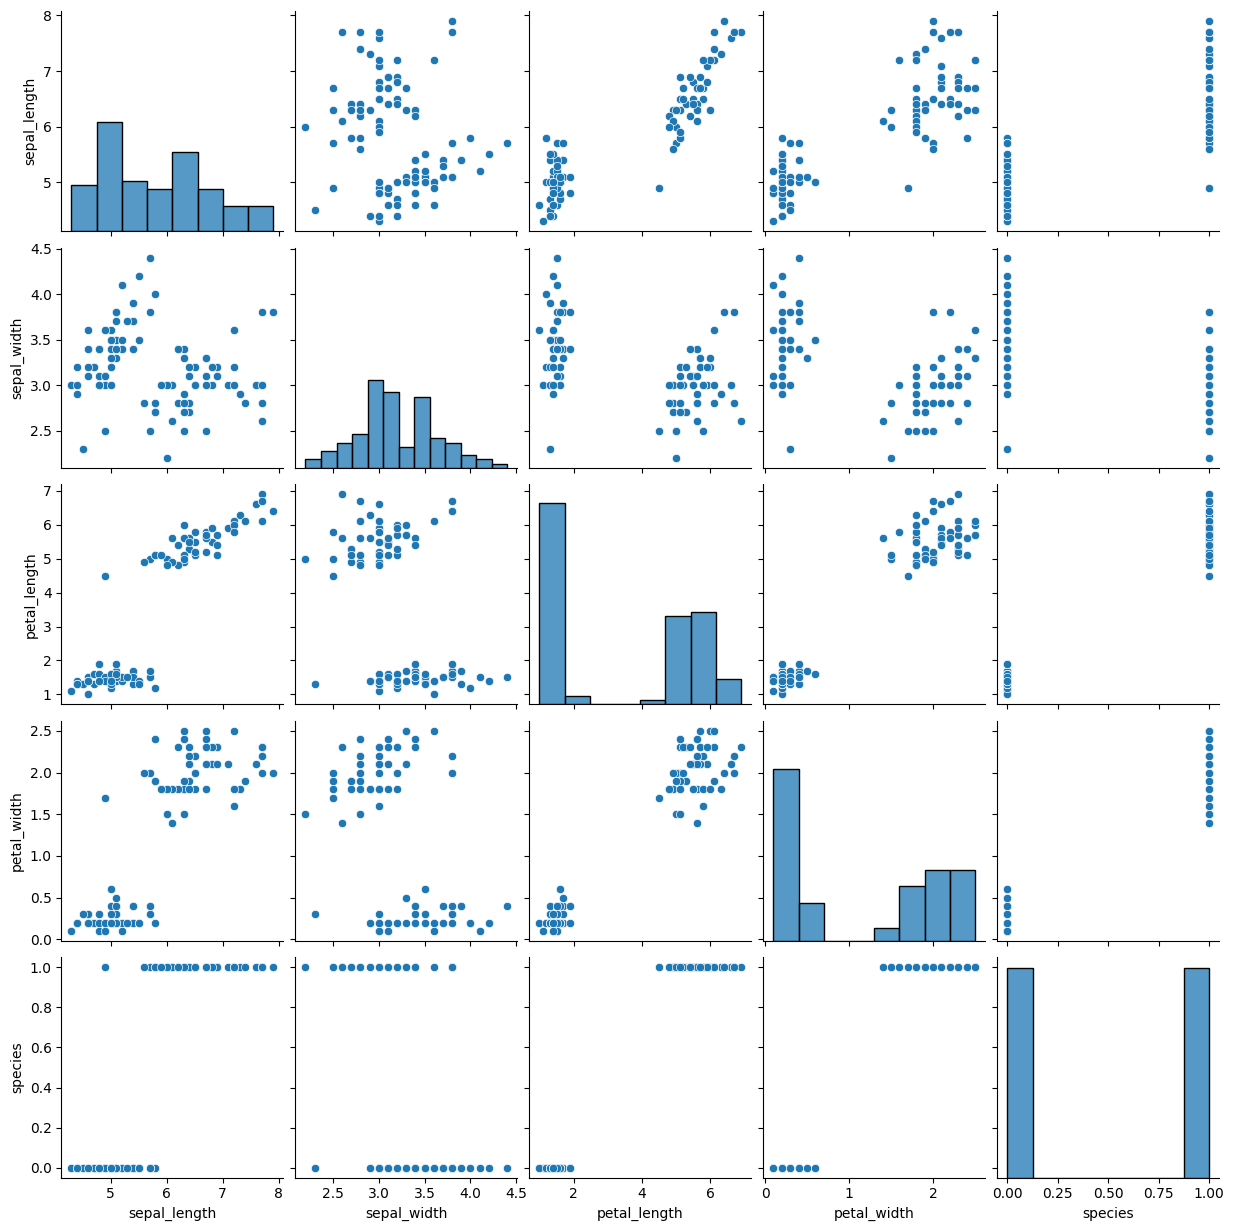

In [79]:
sns.pairplot(df)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [58]:
confusion_matrix(y_test,pre)

array([[ 9,  0],
       [ 0, 11]])

In [59]:
f1_score(y_test,pre)

1.0

In [60]:
precision_recall_curve(y_test,pre)

(array([0.55, 1.  , 1.  ]), array([1., 1., 0.]), array([0, 1]))

In [61]:
roc_auc_score(y_test,pre)

1.0